### 공부시간에 따른 점수 예측하기
- 목표 : 공부시간으로 점수를 예측하기
- 데이터셋 : 임의의 생성
- 피쳐/ 속성: 공부시간
- 타겟/ 라벨: 점수
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : 선형회귀  <== [조건] 데이터분포가 선형 분포여야함!

[1] 데이터 준비

In [58]:
jumsu = range(7, 100, 7)
len(jumsu), jumsu[-1]

hour = list(range(1,29, 2))
len(hour)

14

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# List => DataFrame으로 변환
hourDF = pd.DataFrame(hour, columns=['Hour'])

In [61]:
jumsuSR = pd.Series(jumsu)
print(jumsuSR)

0      7
1     14
2     21
3     28
4     35
5     42
6     49
7     56
8     63
9     70
10    77
11    84
12    91
13    98
dtype: int64


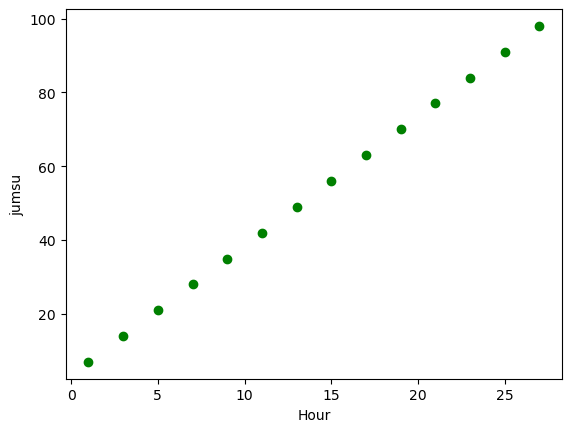

In [62]:
### 현재 데이터의 분포 확인
plt.plot(hourDF, jumsuSR, 'go')
plt.xlabel('Hour')
plt.ylabel('jumsu')
plt.show()

[2] 모델 생성 및 학습 진행

In [63]:
# 모듈로딩
from sklearn.linear_model import LinearRegression

In [64]:
# 인스턴스 생성
model = LinearRegression()

In [65]:
# 학습 진행 => 최대한 많은 데이터를 만족하는 직선의 기울기와 절편 찾기
model.fit(hourDF, jumsuSR)

LinearRegression()

In [66]:
# 학습 후 모델 파라미터
print(f' 기울기: {model.coef_}, 절편: {model.intercept_}')

 기울기: [3.5], 절편: 3.500000000000014


In [67]:
# y=ax+b
pre_jumsu = model.coef_[0]*hourDF+model.intercept_
pre_jumsu=pre_jumsu.values.reshape(-1)


In [68]:
## 실제 점수와 예측 점수의 차이 확인
real_jumsu=jumsuSR.to_numpy()

In [69]:
## 실제 점수와 예측 점수의 차이 확인
real_jumsu - pre_jumsu

array([-1.33226763e-14, -1.06581410e-14, -1.06581410e-14, -7.10542736e-15,
       -7.10542736e-15, -7.10542736e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.42108547e-14,  1.42108547e-14])

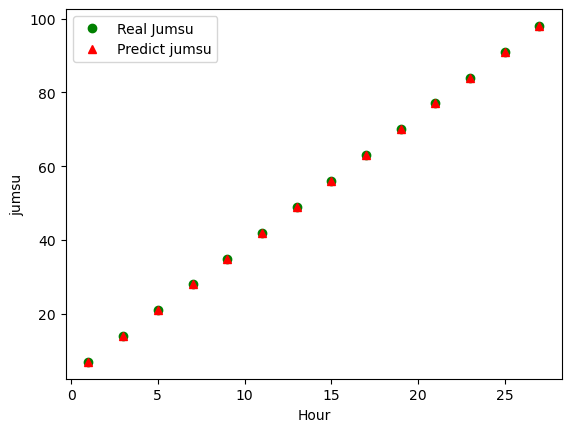

In [70]:
### 현재 데이터의 분포 확인
plt.plot(hourDF, jumsuSR, 'go', label='Real Jumsu')
plt.plot(hourDF, pre_jumsu, 'r^', label='Predict jumsu')
plt.xlabel('Hour')
plt.ylabel('jumsu')
plt.legend()
plt.show()

[3] 모델 성능 평가

In [71]:
model.score(hourDF, jumsuSR)

1.0

In [72]:
### 오차 계산 즉, 손실/비용함수 확인
### - root_mean_squared_error v1.4 이상
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [73]:
pre_y = model.predict(hourDF)

In [74]:
mse = mean_squared_error(jumsuSR, pre_y)
rmse = mean_squared_error(jumsuSR, pre_y, squared = False)
mae = mean_absolute_error(jumsuSR, pre_y)
r2=r2_score(jumsuSR, pre_y)

In [75]:
## 손실/비용함수 값은 0에 가까울 수록
## 결정계수 값은 1에 가까울 수록 좋다
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 6.857455154671224e-29
rmse : 8.280975277508818e-15
mae : 6.026924990822278e-15
r2 : 1.0
